# Loan Data

## Context
This dataset ([source](https://www.kaggle.com/itssuru/loan-data)) consists of data from almost 10,000 borrowers that took loans - with some paid back and others still in progress. It was extracted from lendingclub.com which is an organization that connects borrowers with investors. We've included a few suggested questions at the end of this template to help you get started.

In [1]:
import numpy as np
import pandas as pd

## Loading Data

In [2]:
loan_df = pd.read_csv('loan_data.csv')
variable_explain_df = pd.read_csv('variable_explanation.csv',index_col=0)

In [3]:
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
variable_explain_df

,Explanation
Variable,
credit_policy,1 if the customer meets the credit underwritin...
purpose,The purpose of the loan.
int_rate,The interest rate of the loan (more risky borr...
installment,The monthly installments owed by the borrower ...
log_annual_inc,The natural log of the self-reported annual in...
dti,The debt-to-income ratio of the borrower (amou...
fico,The FICO credit score of the borrower.
days_with_cr_line,The number of days the borrower has had a cred...
revol_bal,The borrower's revolving balance (amount unpai...


### Getting to know the loan file data

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loan_df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### Finding null value counts

In [7]:
loan_df.isnull().value_counts()

credit.policy  purpose  int.rate  installment  log.annual.inc  dti    fico   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid
False          False    False     False        False           False  False  False              False      False       False           False        False    False             9578
dtype: int64

No null values detected

Replacing '.' with '_' in the column names

In [8]:
loan_df.columns = [c.replace(".", "_") for c in loan_df.columns]
loan_df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Understanding your variables

In [9]:
variable_explain_df.head()

,Explanation
Variable,
credit_policy,1 if the customer meets the credit underwritin...
purpose,The purpose of the loan.
int_rate,The interest rate of the loan (more risky borr...
installment,The monthly installments owed by the borrower ...
log_annual_inc,The natural log of the self-reported annual in...


In [10]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, value in enumerate(loan_df.columns):
    variables.loc[i] = [value, loan_df[value].nunique(), loan_df[value].unique().tolist()]

variables =  variables.set_index('Variable').join(variable_explain_df)
variables

C:\Users\godfa\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,Number of unique values,Values,Explanation
Variable,,,
credit_policy,2,"[1, 0]",1 if the customer meets the credit underwritin...
purpose,7,"[debt_consolidation, credit_card, all_other, h...",The purpose of the loan.
int_rate,249,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078...",The interest rate of the loan (more risky borr...
installment,4788,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13...",The monthly installments owed by the borrower ...
log_annual_inc,1987,"[11.35040654, 11.08214255, 10.37349118, 11.299...",The natural log of the self-reported annual in...
dti,2529,"[19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ...",The debt-to-income ratio of the borrower (amou...
fico,44,"[737, 707, 682, 712, 667, 727, 722, 677, 662, ...",The FICO credit score of the borrower.
days_with_cr_line,2687,"[5639.958333, 2760.0, 4710.0, 2699.958333, 406...",The number of days the borrower has had a cred...
revol_bal,7869,"[28854, 33623, 3511, 33667, 4740, 50807, 3839,...",The borrower's revolving balance (amount unpai...


## EDA with Visuals

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

### Finding Majority of Customer Population Fico Scores
Majority of the customers lie between 670 & 710 fico scores

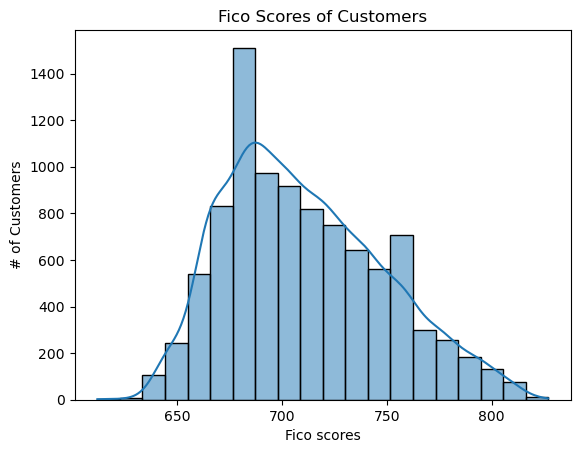

In [12]:
#Find fico scores and purpose
sns.histplot(x='fico',data= loan_df, kde=True,bins = 20)
plt.xlabel('Fico scores')
plt.ylabel('# of Customers')
plt.title('Fico Scores of Customers')
plt.show()

Majority of the customers lie between 670 & 710 fico scores

### Find the prime reason for getting the loan

From the below graph it is evident that the debit consoliation is the main reason and it is mainly with customers having Fico score less than 710

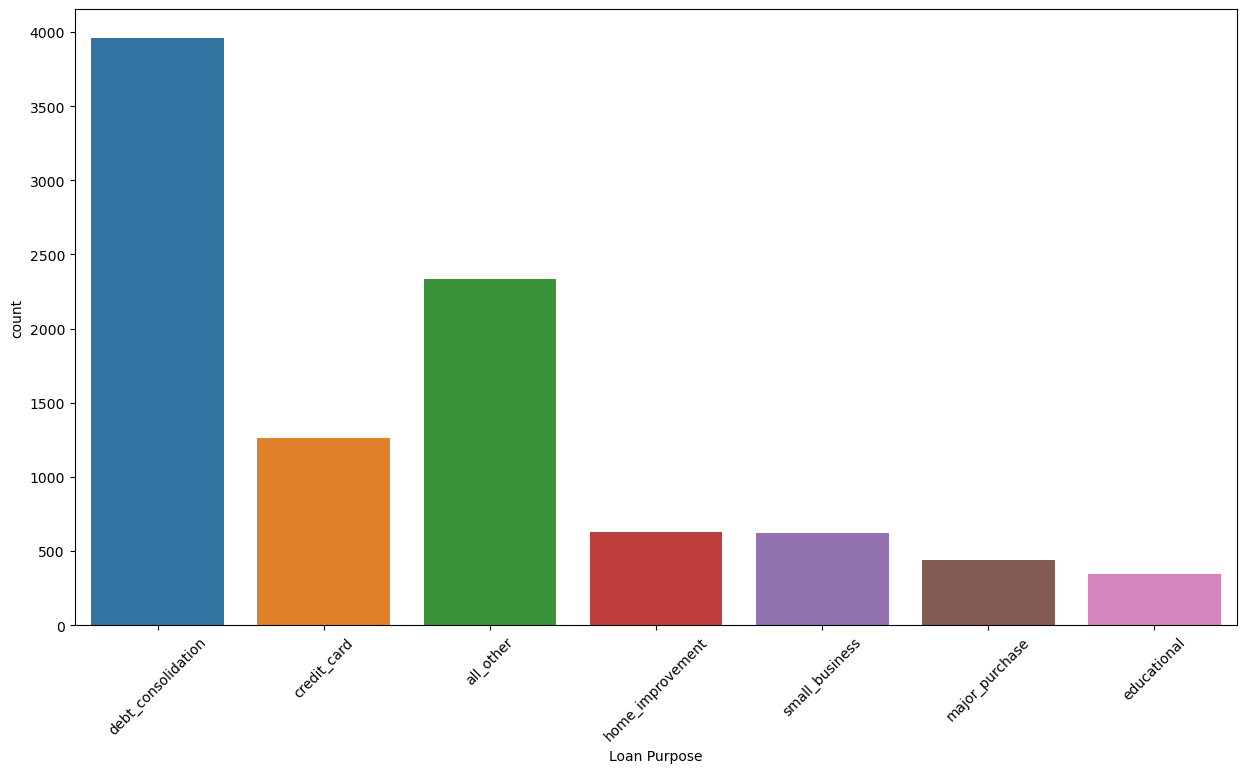

In [13]:
fig=plt.gcf()
fig.set_size_inches(15,8)
sns.countplot(x='purpose',data=loan_df)
plt.xlabel("Loan Purpose")
plt.xticks(rotation=45)
plt.show()

In [14]:
counts_pur_fico = loan_df.groupby(['fico','purpose'],as_index=False)['int_rate'].count().reset_index()
counts_pur_fico.rename(columns = {'int_rate':'Counts'}, inplace = True)
counts_pur_fico.drop(columns='index',inplace=True)

#### Plot top 5 reasons purpose and Fico

In [15]:
counts_pur_fico['rank'] = counts_pur_fico['Counts'].rank(method='dense',ascending=False)
counts_pur_fico = counts_pur_fico[counts_pur_fico['rank'] <=5]

In [16]:
counts_pur_fico

,fico,purpose,Counts,rank
72,682,debt_consolidation,252,1.0
79,687,debt_consolidation,250,2.0
86,692,debt_consolidation,240,3.0
93,697,debt_consolidation,227,4.0
100,702,debt_consolidation,212,5.0


The main reason of borrowing money is debt consolidation and it is majorly in the customers having Fico score less than 710

### Number of customer that have paid vs not Paid

In [17]:
not_paid = loan_df['not_fully_paid'].value_counts().reset_index()
print(not_paid)

   index  not_fully_paid
0      0            8045
1      1            1533


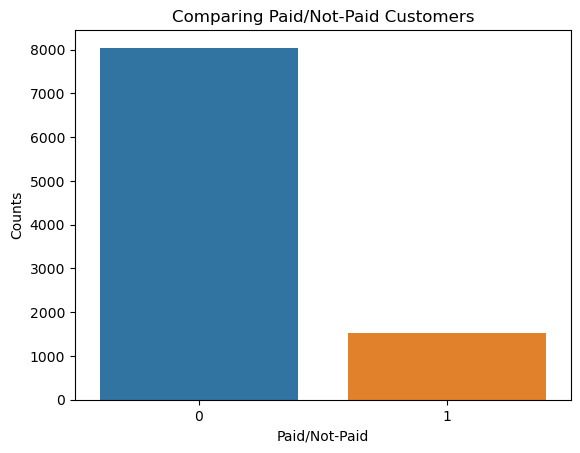

In [18]:
sns.countplot(x='not_fully_paid',data=loan_df)
plt.ylabel('Counts')
plt.xlabel('Paid/Not-Paid')
plt.title('Comparing Paid/Not-Paid Customers')
plt.show()

### Correlation matrix with paying back the loan

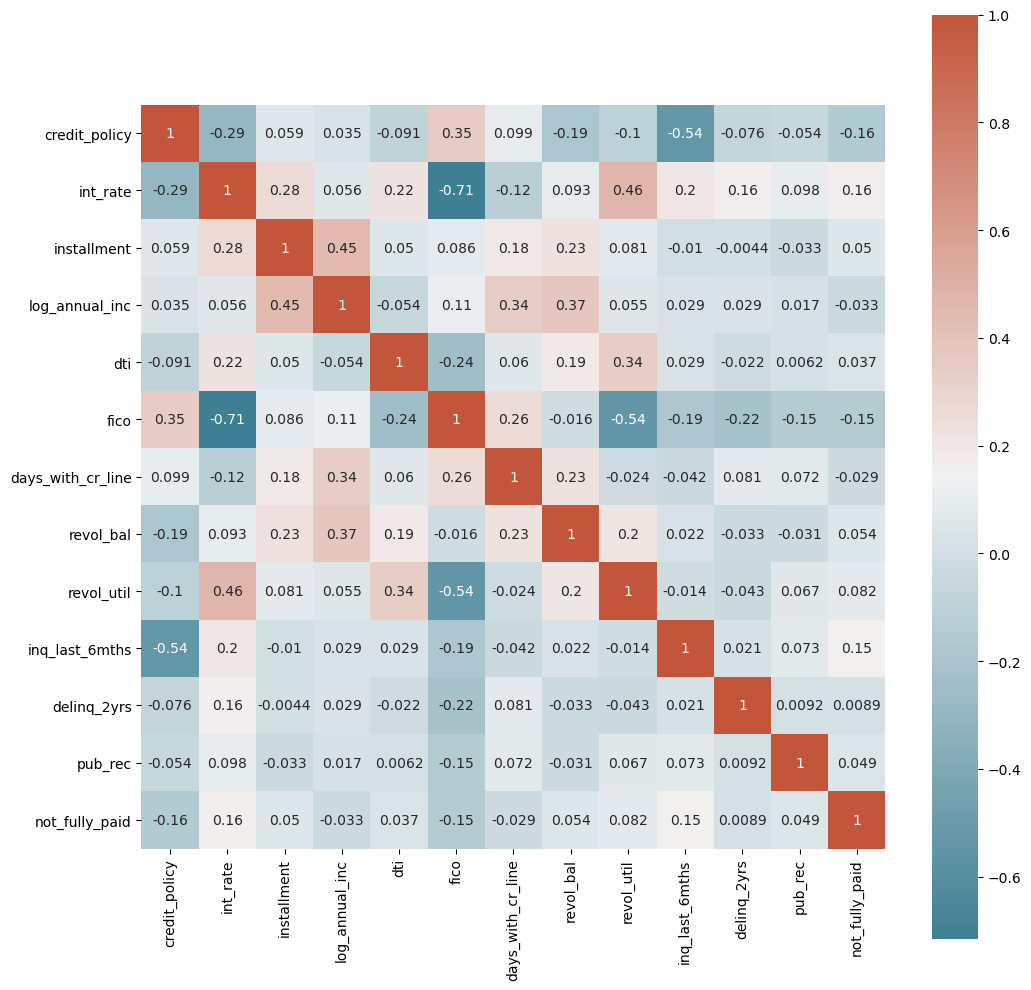

In [19]:
cor_mat= loan_df.corr()
fig=plt.gcf()
fig.set_size_inches(12,12)
sns.heatmap(data=cor_mat, square=True, annot=True, cbar=True,cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

## Working with Features & Model 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler

Convert the categorical variables using OneHotEncoder. Since models work better and fast with numerical data

In [21]:
loan_df.shape

(9578, 14)

In [22]:
X = loan_df.iloc[:,:-1]
y = loan_df.iloc[:,-1]
X

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0


In [23]:
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [24]:
categorical_var = ['purpose']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[categorical_var]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[categorical_var]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(categorical_var, axis=1)
num_X_test = X_test.drop(categorical_var, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [25]:
OH_X_train.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,0,1,2,3,4,5,6
7317,1,0.1459,327.42,9.994242,11.41,692,5239.041667,144,28.8,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
350,1,0.0838,236.34,11.225243,6.06,742,3149.041667,4286,40.4,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5206,1,0.1148,138.47,11.170435,6.83,717,3810.000000,11974,72.1,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2673,1,0.0932,527.13,11.058858,8.35,732,4079.958333,41921,85.2,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3528,1,0.1126,312.21,10.693398,19.04,757,7049.958333,336,4.7,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
print("Shape of training Data - {}".format(OH_X_train.shape))
print("Shape of test Data - {}".format(OH_X_test.shape))

Shape of training Data - (7662, 19)
Shape of test Data - (1916, 19)


In [27]:
minmax = MinMaxScaler()
scaled_X_train = minmax.fit_transform(OH_X_train)
scaled_X_test = minmax.transform(OH_X_test)

In [28]:
print("Shape of final X_train - {}".format(scaled_X_train.shape))

Shape of final X_train - (7662, 19)


Building a baseline model in order to iterate and improve over time. From the above analysis we have noticed that 1533 customers have yet not paid fully.

In [29]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(verbose=True,n_jobs=-1)
logreg.fit(scaled_X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished


LogisticRegression(n_jobs=-1, verbose=True)

In [30]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(scaled_X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(scaled_X_test,y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  0.8413361169102297
[[1602    9]
 [ 295   10]]


Currently our model is giving a 84.13% accuracy. But surely we can do better using HyperParameter Tuning for the model. 

### HyperParameter Tuning 

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV

In [32]:
def get_models_rfe():
    models = dict()
    for i in range(2,19):
        rfe = RFE(estimator=GradientBoostingClassifier(),n_features_to_select=i)
        model = GradientBoostingClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

In [33]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)    
    return scores

In [34]:
models_rfe = get_models_rfe()
results, names = list(),list()
for name, model in models_rfe.items():
    scores = evaluate_model(model,scaled_X_train,y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>2 0.838 (0.002)
>3 0.838 (0.002)
>4 0.837 (0.002)
>5 0.838 (0.003)
>6 0.838 (0.003)
>7 0.837 (0.003)
>8 0.838 (0.004)
>9 0.837 (0.003)
>10 0.837 (0.004)
>11 0.837 (0.003)
>12 0.837 (0.004)
>13 0.837 (0.004)
>14 0.837 (0.004)
>15 0.837 (0.004)
>16 0.837 (0.004)
>17 0.838 (0.004)
>18 0.837 (0.004)


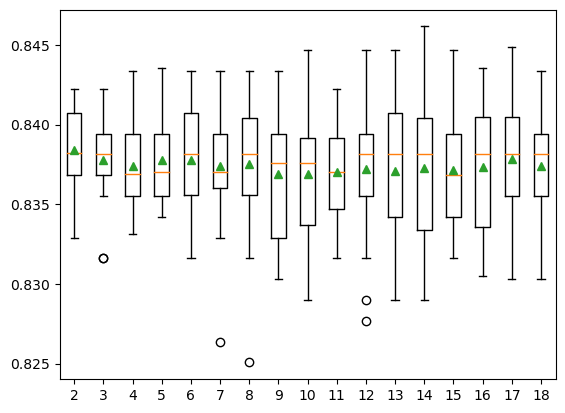

In [35]:
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [36]:
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(scaled_X_train, y_train)
# summarize all features
for i in range(scaled_X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 6.000
Column: 1, Selected False, Rank: 3.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 2.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 4.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 5.000
Column: 10, Selected False, Rank: 8.000
Column: 11, Selected False, Rank: 13.000
Column: 12, Selected False, Rank: 7.000
Column: 13, Selected False, Rank: 14.000
Column: 14, Selected False, Rank: 9.000
Column: 15, Selected False, Rank: 12.000
Column: 16, Selected False, Rank: 10.000
Column: 17, Selected False, Rank: 15.000
Column: 18, Selected False, Rank: 11.000


In [37]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
    model = LogisticRegression()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
    model = Perceptron()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
    model = RandomForestClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier())
    model = GradientBoostingClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models


In [38]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, scaled_X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>lr 0.839 (0.002)
>per 0.730 (0.201)
>cart 0.727 (0.014)
>rf 0.836 (0.004)
>gbm 0.837 (0.003)


### Finding the best performing model
<p>We have defined the grid of hyperparameter values and converted them into a single dictionary format which <code>GridSearchCV()</code> expects as one of its parameters. Now, we will begin the grid search to see which values perform best.</p>
<p>We will instantiate <code>GridSearchCV()</code> with our earlier <code>logreg</code> model with all the data we have. Instead of passing train and test sets separately, we will supply <code>X</code> (scaled version) and <code>y</code>. We will also instruct <code>GridSearchCV()</code> to perform a <a href="https://www.dataschool.io/machine-learning-with-scikit-learn/">cross-validation</a> of five folds.</p>
<p>We'll end the notebook by storing the best-achieved score and the respective best parameters.</p>

In [39]:
tol = [0.01, 0.001,0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol,max_iter=max_iter)

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid,n_jobs=-1 ,cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = minmax.fit_transform(OH_X_train)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


Best: 0.840251 using {'max_iter': 100, 'tol': 0.01}


## Summary
- Build a model that can predict the probability a user will be able to pay back their loan within a certain period.
- We see that majority of the people take loans for debt consolidation and the fico scores of them is less thann 710
